In [1]:
%matplotlib inline
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.decomposition import PCA
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
data=pd.read_csv('shopping_trends.csv')
data.head()

,Customer ID,Age,Gender,Purchase Amount (USD),Review Rating,Subscription Status,Previous Purchases,Frequency of Purchases
0,1,55,Male,53,3.1,Yes,14,Fortnightly
1,2,19,Male,64,3.1,Yes,2,Fortnightly
2,3,50,Male,73,3.1,Yes,23,Weekly
3,4,21,Male,90,3.5,Yes,49,Weekly
4,5,45,Male,49,2.7,Yes,31,Annually


In [3]:
data=data[['Customer ID','Purchase Amount (USD)','Previous Purchases','Frequency of Purchases']]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Customer ID             3900 non-null   int64 
 1   Purchase Amount (USD)   3900 non-null   int64 
 2   Previous Purchases      3900 non-null   int64 
 3   Frequency of Purchases  3900 non-null   object
dtypes: int64(3), object(1)
memory usage: 122.0+ KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,3900.0,1950.500000,1125.977353,1.0,975.75,1950.5,2925.25,3900.0
Purchase Amount (USD),3900.0,59.764359,23.685392,20.0,39.00,60.0,81.00,100.0
Previous Purchases,3900.0,25.351538,14.447125,1.0,13.00,25.0,38.00,50.0


In [6]:
data.head()

,Customer ID,Purchase Amount (USD),Previous Purchases,Frequency of Purchases
0,1,53,14,Fortnightly
1,2,64,2,Fortnightly
2,3,73,23,Weekly
3,4,90,49,Weekly
4,5,49,31,Annually


<Axes: xlabel='Frequency of Purchases', ylabel='count'>

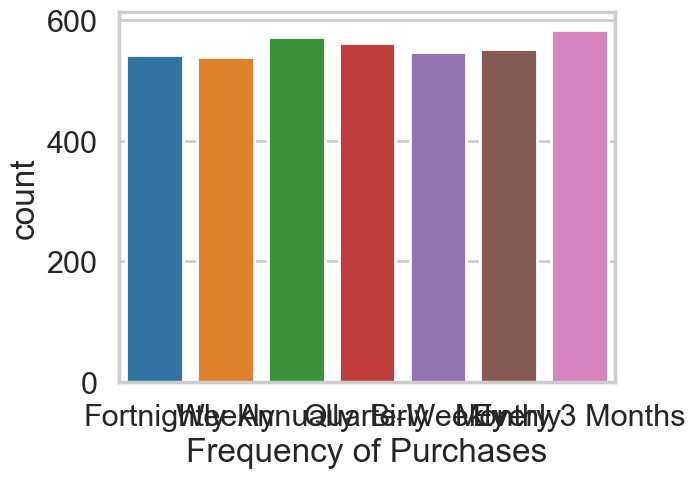

In [7]:
sns.countplot(data =data, x='Frequency of Purchases')

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Frequency of Purchases']=le.fit_transform(data['Frequency of Purchases'])
data.head()

,Customer ID,Purchase Amount (USD),Previous Purchases,Frequency of Purchases
0,1,53,14,3
1,2,64,2,3
2,3,73,23,6
3,4,90,49,6
4,5,49,31,0


In [9]:
clust=KMeans(n_clusters=3)
clust.fit(data)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [10]:
clust.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 'warn',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [11]:
clust.inertia_

552313515.7993894

In [12]:
clust.n_clusters

3

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

Text(0, 0.5, 'Error')

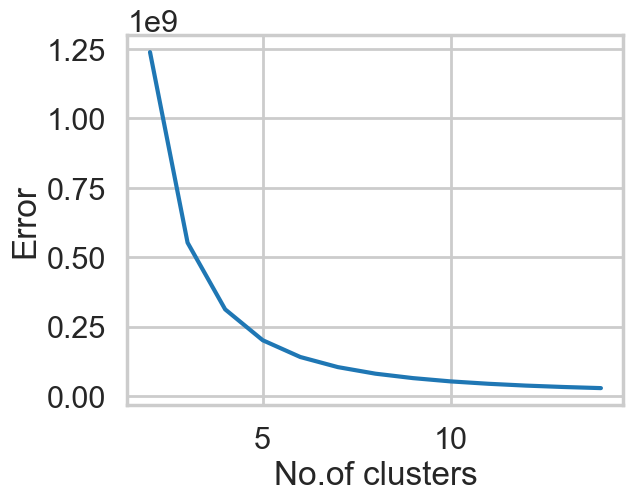

In [13]:
k=list(range(2,15))
y=[]
for i in k:
    km=KMeans(n_clusters=i,random_state=1)
    km.fit(data)
    labels=km.labels_
    y.append(km.inertia_)
plt.plot(k,y)
plt.xlabel('No.of clusters')
plt.ylabel('Error')

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0, 0.5, 'size')

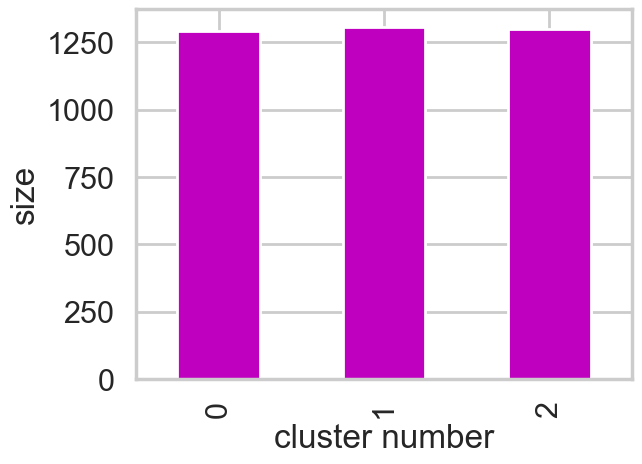

In [14]:
cluster=KMeans(n_clusters=3,random_state=2)
data['cluster']=cluster.fit_predict(data)
data.cluster.value_counts().sort_index().plot(kind='bar',color='m')
plt.xlabel('cluster number')
plt.ylabel('size')

In [15]:
from sklearn.metrics import silhouette_score
labels=clust.labels_
print(labels,len(labels))
print('Silhouette Score:\t',silhouette_score(data,labels))

[2 2 2 ... 1 1 1] 3900
Silhouette Score:	 0.5866436709903251


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


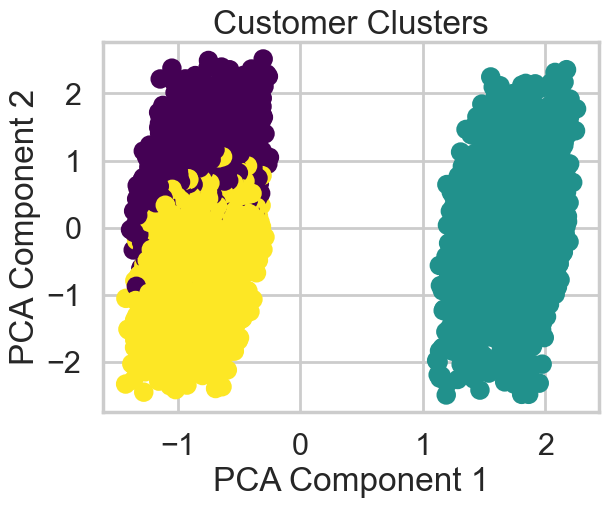

         Customer ID  Purchase Amount (USD)  Previous Purchases  \
Cluster                                                           
0        2572.299845              59.271252           27.299845   
1         647.000000              59.839134           26.129157   
2        2621.342727              60.176695           22.665651   

         Frequency of Purchases   cluster  
Cluster                                    
0                      4.701700  1.520093  
1                      2.986079  0.000000  
2                      1.261995  1.477532  


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
k = 3 
kmeans = KMeans(n_clusters=k, random_state=0)
data['Cluster'] = kmeans.fit_predict(scaled_data)

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=data['Cluster'], cmap='viridis')
plt.title('Customer Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
cluster_means = data.groupby('Cluster').mean()
print(cluster_means)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

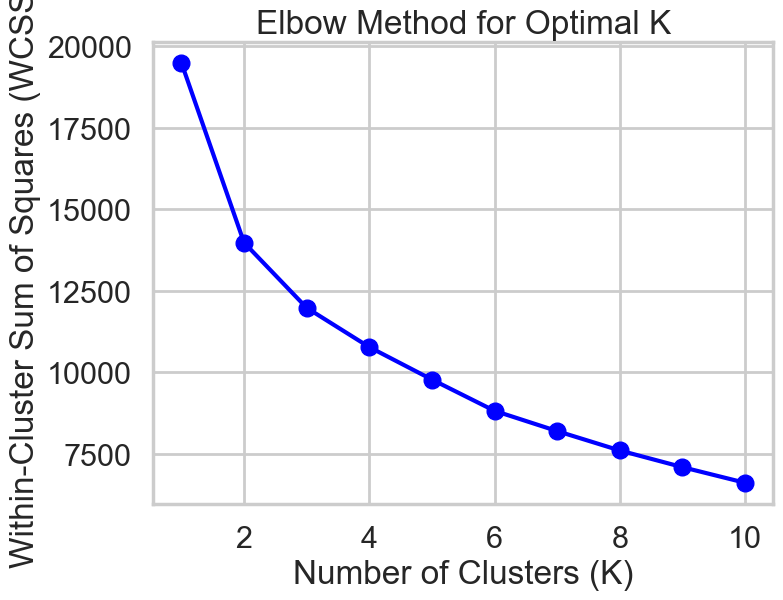

In [17]:
k_values = range(1, 11)
wcss = [] 

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()